In [25]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms, models
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from PIL import Image

In [26]:
data_dir = r'C:\Users\USER\Desktop\데이터셋\final\vegetable_13class\Cropped_Fresh'
valid_size = 0.2

t_transforms = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

dataset = datasets.ImageFolder(root=data_dir, transform=t_transforms)

print(t_transforms)

Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)


In [27]:
train_data = datasets.ImageFolder(data_dir, transform = t_transforms)
test_data = datasets.ImageFolder(data_dir, transform = t_transforms)

print("train_data: ", train_data)
print("="*50)
print("train_data length: ", len(train_data), ", test_data length: ", len(test_data))

train_data:  Dataset ImageFolder
    Number of datapoints: 913
    Root location: C:\Users\USER\Desktop\데이터셋\final\vegetable_13class\Cropped_Fresh
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
train_data length:  913 , test_data length:  913


#### train/test split 

In [28]:
num_train = len(train_data)
indices = list(range(num_train))
print("indices: ", indices)

np.random.shuffle(indices)
print("Shuffle indices: ", indices)

split = int(np.floor(num_train * valid_size))
print("split 지점: ", split)

indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [29]:
train_idx, test_idx = indices[split:], indices[:split]

print("train idx: ", train_idx)
print("test idx: ", test_idx)

train idx:  [527, 755, 370, 369, 786, 204, 599, 597, 586, 605, 856, 208, 549, 367, 150, 618, 110, 630, 845, 300, 873, 416, 854, 521, 690, 805, 135, 72, 892, 585, 872, 299, 215, 113, 188, 877, 695, 162, 640, 361, 515, 160, 202, 436, 812, 257, 101, 855, 894, 811, 487, 38, 40, 410, 661, 290, 87, 745, 832, 195, 83, 589, 288, 35, 46, 15, 41, 230, 799, 871, 221, 232, 173, 51, 823, 441, 603, 122, 725, 141, 789, 377, 397, 775, 773, 795, 455, 711, 362, 63, 285, 403, 327, 620, 174, 840, 699, 830, 458, 100, 719, 121, 108, 318, 429, 669, 363, 737, 899, 133, 600, 197, 782, 425, 831, 304, 488, 450, 687, 59, 179, 839, 314, 807, 360, 78, 190, 815, 495, 280, 492, 67, 457, 531, 56, 735, 32, 570, 375, 594, 810, 151, 283, 258, 562, 181, 880, 325, 270, 758, 120, 507, 702, 335, 686, 282, 712, 0, 478, 461, 260, 7, 741, 612, 885, 297, 893, 381, 109, 371, 89, 249, 718, 239, 250, 776, 271, 13, 614, 161, 517, 170, 17, 351, 187, 359, 876, 561, 701, 512, 437, 619, 205, 163, 643, 891, 321, 604, 607, 140, 11, 19, 79

#### Dataloader 확인 

In [30]:
from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size = 64)
testloader = torch.utils.data.DataLoader(test_data, sampler=train_sampler, batch_size = 64)

print('trainloader class: ', trainloader.dataset.classes)
print('testloader class: ', testloader.dataset.classes)

trainloader class:  ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']
testloader class:  ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']


#### Dataload 함수 

In [31]:
def load_split_train_test(data_dir, valid_size):
    t_transforms = transforms.Compose([
        #transforms.RandomResizedCrop(224),
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    train_data = datasets.ImageFolder(data_dir, transform = t_transforms)
    test_data = datasets.ImageFolder(data_dir, transform = t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))

    np.random.shuffle(indices)
    split = int(np.floor(num_train * valid_size))
    train_idx, test_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    # batch_size 바꾸기 
    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size = 64)
    testloader = torch.utils.data.DataLoader(test_data, sampler=train_sampler, batch_size = 64)

    return trainloader, testloader

In [32]:
trainloader, testloader = load_split_train_test(data_dir, 0.2)

print('trainloader class: ', trainloader.dataset.classes)
print('testloader class: ', testloader.dataset.classes)

trainloader class:  ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']
testloader class:  ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']


#### image, label 가져오기 

In [33]:
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform = t_transforms)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    idx = indices[:num]

    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size = num)

    dataiter = iter(loader)
    images, labels = next(dataiter)

    return images, labels

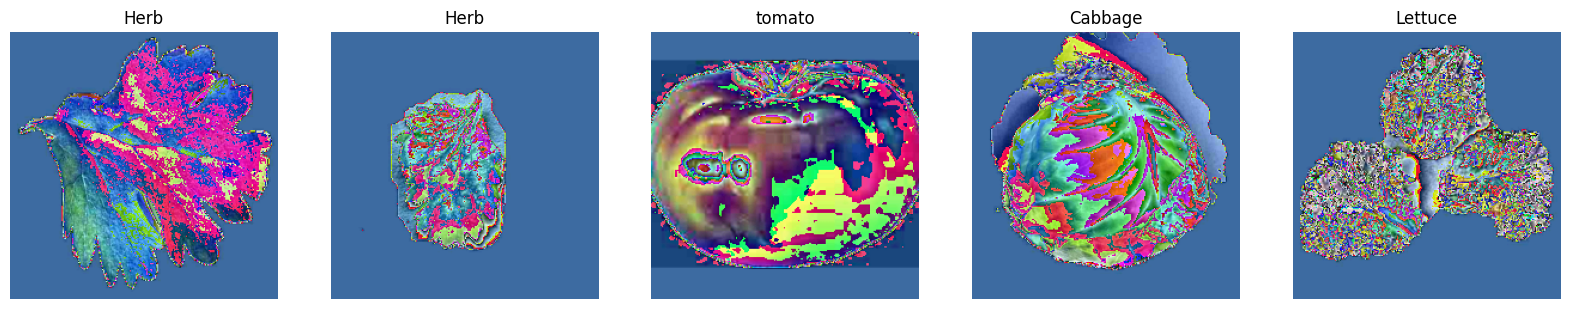

In [34]:
# 이미지 확인해보기 

images, labels = get_random_images(5)

to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20, 20))

classes = trainloader.dataset.classes

for ii in range(len(images)):
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    index = labels[ii].item()
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)

plt.show()

# 모델 학습 

#### resnet50 지정

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

model = models.resnet50(pretrained=True)

device:  cpu


#### 전이학습을 위한 FCL 수정 

In [36]:
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(2048, 512),
                         nn.ReLU(),
                         nn.Dropout(0, 2),
                         nn.Linear(512, 14),
                         nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.fc.parameters(), lr=0.001) 

model.to(device)
print('done!')

done!


#### FCL 학습 / TEST / 평가 

In [37]:
epochs = 10        # 20
print_every = 5    # 4

steps = 0
running_loss = 0
train_losses, test_losses = [], []

In [38]:
train_losses = []
test_losses = []
accuracies = []
accuracies1 = []


total_train_loss = 0
total_test_loss = 0
total_accuracy = 0
total_correct = 0
total_samples = 0

for epoch in range(epochs):
    epoch += 1
    running_loss = 0  

    for inputs, labels in trainloader:
        steps += 1
        print('Training step ', steps)

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model.forward(inputs)
        loss = criterion(logps, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()  

        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            correct = 0
            samples = 0

            model.eval()

            with torch.no_grad():

                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)

                    logps = model.forward(inputs)

                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()

                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)

                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    correct += equals.sum().item()  
                    samples += labels.size(0)  

            avg_train_loss = running_loss / len(trainloader)
            avg_test_loss = test_loss / len(testloader)
            avg_accuracy = accuracy / len(testloader)
            avg_accuracy1 = correct / samples

            
            train_losses.append(avg_train_loss)
            test_losses.append(avg_test_loss)
            accuracies.append(avg_accuracy)
            accuracies1.append(avg_accuracy1)

            print(f"Epoch {epoch}/{epochs} ",
                  f"Train loss: {avg_train_loss:.3f}.. ",
                  f"Test loss: {avg_test_loss:.3f}.. ",
                  f"Test accuracy1: {avg_accuracy1:.3f}.. ",
                  f"Test accuracy: {avg_accuracy:.3f}\n")


            total_train_loss += avg_train_loss
            total_test_loss += avg_test_loss
            total_accuracy += avg_accuracy
            total_correct += correct  
            total_samples += samples

            running_loss = 0

            model.train()
            break


final_train_loss = total_train_loss / epochs
final_test_loss = total_test_loss / epochs
final_accuracy = total_accuracy / epochs
final_accuracy1 = total_correct / total_samples

print(f"\n✅ Training Finished!")
print(f"🔥 Average Train Loss: {final_train_loss:.3f}")
print(f"🔥 Average Test Loss: {final_test_loss:.3f}")
print(f"🔥 Average Test Accuracy: {final_accuracy:.3f}")
print(f"🔥 Average Test Accuracy1: {final_accuracy1:.3f}")

Training step  1
Training step  2
Training step  3
Training step  4
Training step  5
Epoch 1/10  Train loss: 0.886..  Test loss: 1.432..  Test accuracy1: 0.650..  Test accuracy: 0.647

Training step  6
Training step  7
Training step  8
Training step  9
Training step  10
Epoch 2/10  Train loss: 0.466..  Test loss: 0.675..  Test accuracy1: 0.856..  Test accuracy: 0.856

Training step  11
Training step  12
Training step  13
Training step  14
Training step  15
Epoch 3/10  Train loss: 0.236..  Test loss: 0.350..  Test accuracy1: 0.938..  Test accuracy: 0.941

Training step  16
Training step  17
Training step  18
Training step  19
Training step  20
Epoch 4/10  Train loss: 0.160..  Test loss: 0.218..  Test accuracy1: 0.966..  Test accuracy: 0.967

Training step  21
Training step  22
Training step  23
Training step  24
Training step  25
Epoch 5/10  Train loss: 0.101..  Test loss: 0.167..  Test accuracy1: 0.967..  Test accuracy: 0.965

Training step  26
Training step  27
Training step  28
Train

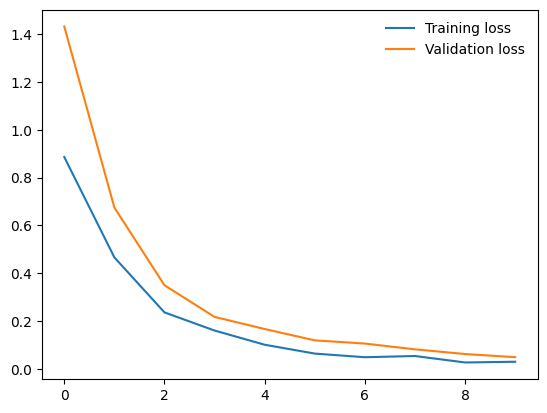

In [39]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

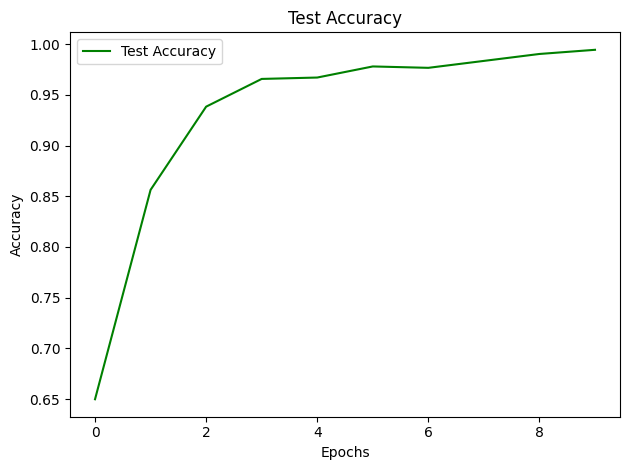

In [40]:
plt.plot(range(epochs), accuracies1, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### model 저장 

In [41]:
torch.save(model, r'C:\Users\USER\Desktop\데이터셋\resnet\v_14class_batch64_lr0.001_epoch10_normalize.pth')

# 저장한 model로 실제 Image 예측

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load(r'C:\Users\USER\Desktop\데이터셋\resnet\v_14class_batch64_lr0.001_epoch10_normalize.pth', weights_only=False)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [43]:
def predict_image(image):
    image_tensor = t_transforms(image).float()
    input = image_tensor.unsqueeze_(0)
    input = input.to(device)
    output = model(input)
    index = output.data.numpy().argmax()

    return index

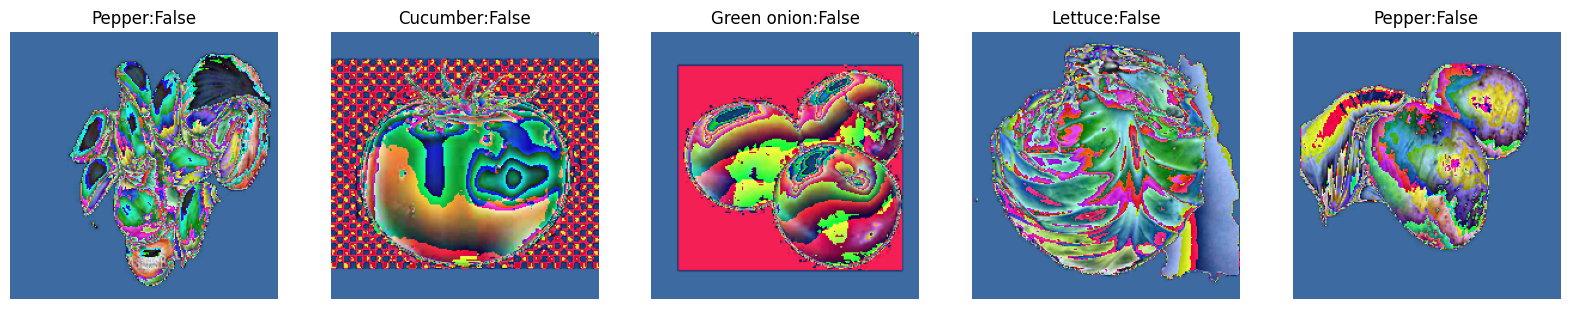

In [44]:
model.eval()

to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig = plt.figure(figsize=(20, 20))
classes = trainloader.dataset.classes

for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    
    sub = fig.add_subplot(1, len(images), ii+1)
    res = labels[ii].item() == index
    sub.set_title(classes[index] + ':' + str(res))

    plt.axis('off')
    plt.imshow(image)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24524\906652970.py:45: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_24524\906652970.py:45: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


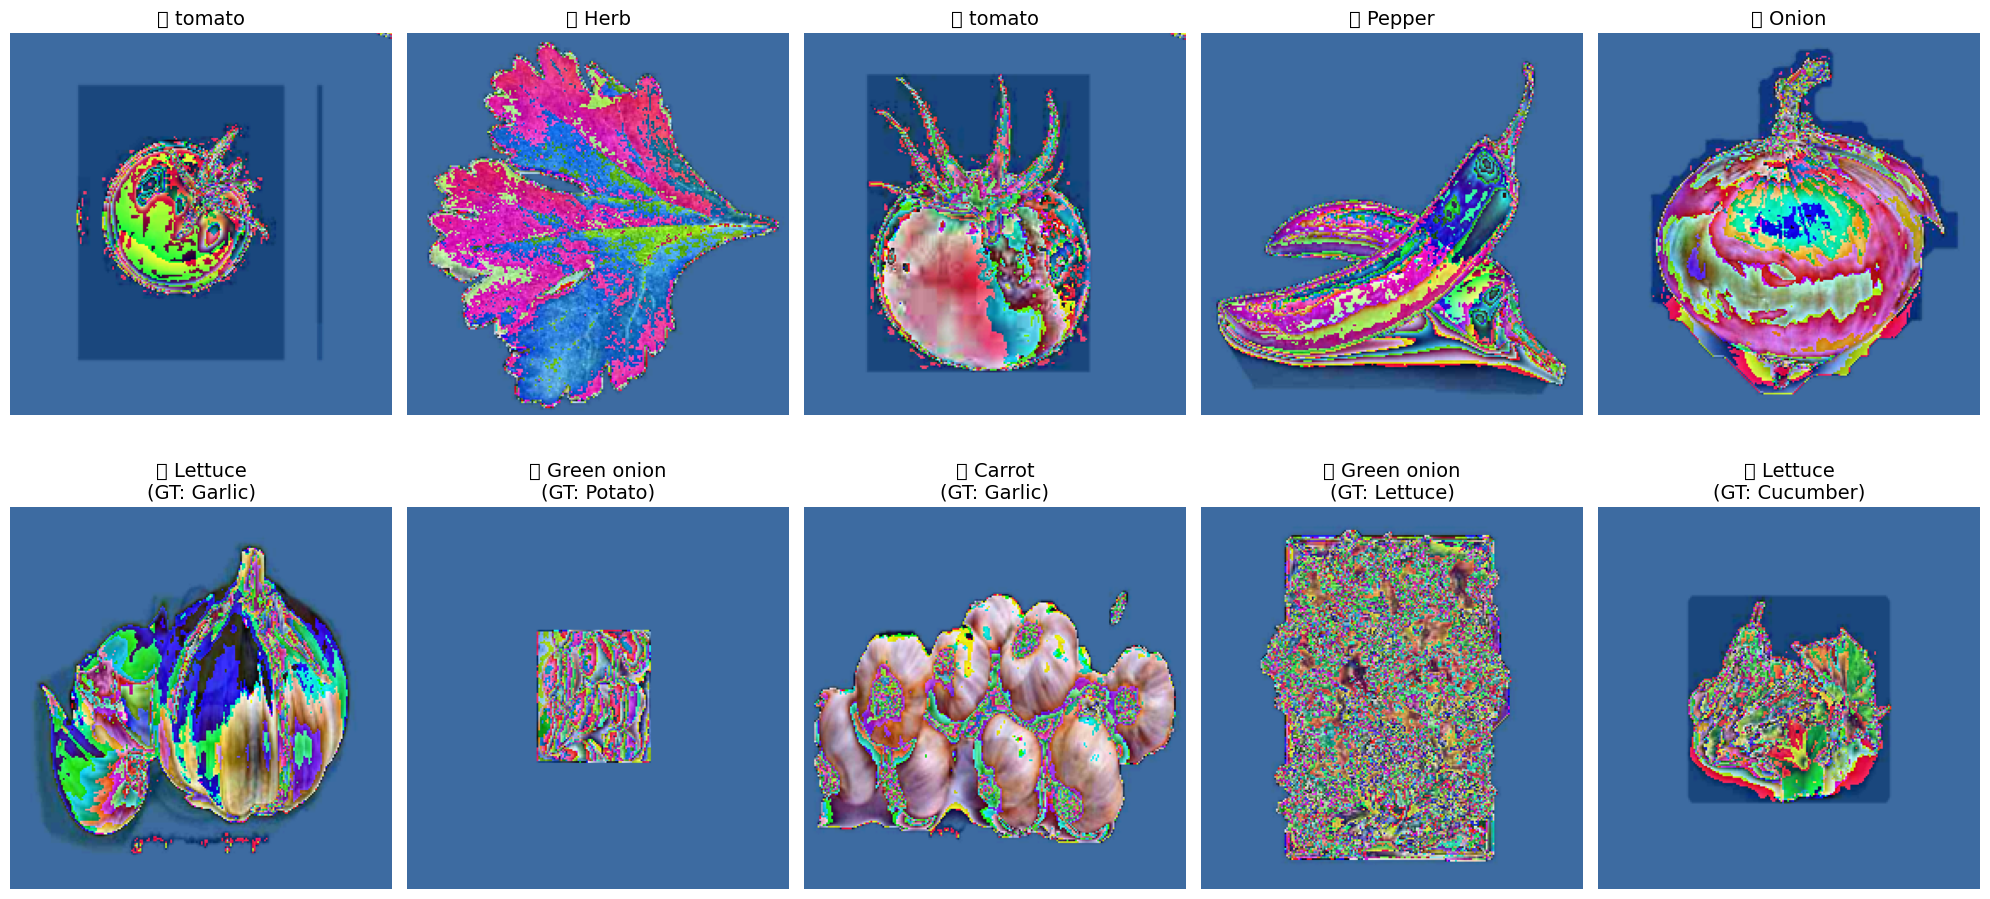

In [45]:
model.eval()
to_pil = transforms.ToPILImage()


images, labels = get_random_images(50)  
classes = trainloader.dataset.classes


correct_images, correct_labels, correct_preds = [], [], []
wrong_images, wrong_labels, wrong_preds = [], [], []


for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    
    if labels[ii].item() == index:
        correct_images.append(image)
        correct_labels.append(labels[ii].item())
        correct_preds.append(index)
    else:
        wrong_images.append(image)
        wrong_labels.append(labels[ii].item())
        wrong_preds.append(index)


correct_samples = list(zip(correct_images, correct_labels, correct_preds))[:5]
wrong_samples = list(zip(wrong_images, wrong_labels, wrong_preds))[:5]


fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, (image, label, pred) in enumerate(correct_samples):
    ax = axes[0, i]
    ax.imshow(image)
    ax.set_title(f"✅ {classes[pred]}", fontsize=14)
    ax.axis("off")

for i, (image, label, pred) in enumerate(wrong_samples):
    ax = axes[1, i]
    ax.imshow(image)
    ax.set_title(f"❌ {classes[pred]}\n(GT: {classes[label]})", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()